#### LIBRERIAS
----------

In [1]:
import numpy as np

##!pip install opencv-python
import cv2 ### para leer imagenes jpeg


from matplotlib import pyplot as plt ## para gráfciar imágnes
import joblib ### para descargar array




#### VISUALIZACION DE LAS IMAGENES
-----------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


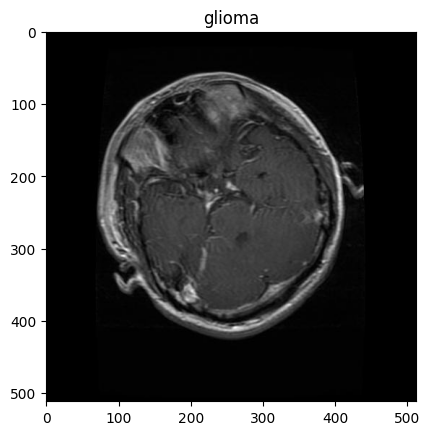

In [3]:
img1=cv2.imread('/content/drive/MyDrive/operaciones/data/glioma/glioma_test_0000.jpg')

plt.imshow(img1)
plt.title('glioma')
plt.show()

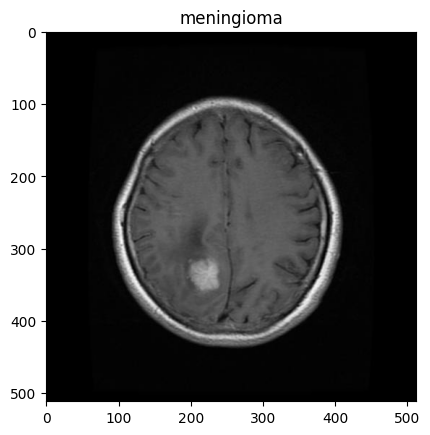

In [ ]:
img2=cv2.imread('/content/drive/MyDrive/operaciones/data/meningioma/meningioma_test_0000.jpg')

plt.imshow(img2)
plt.title('meningioma')
plt.show()

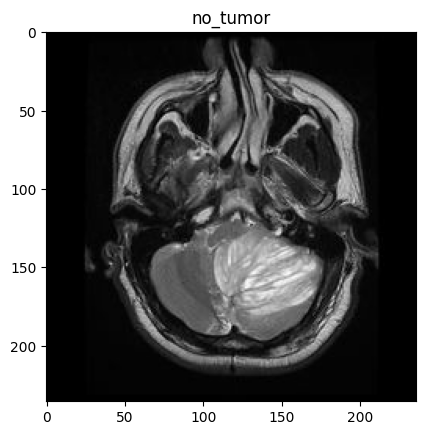

In [ ]:
img3=cv2.imread('/content/drive/MyDrive/operaciones/data/notumor/notumor_test_0000.jpg')

plt.imshow(img3)
plt.title('no_tumor')
plt.show()

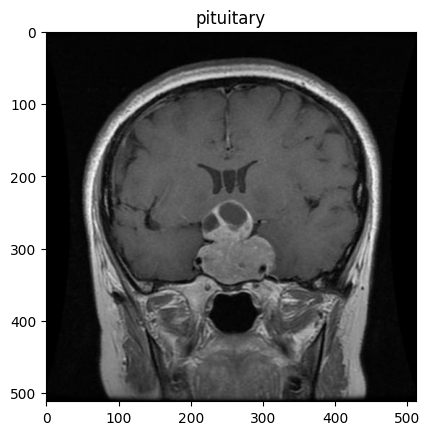

In [ ]:
img4=cv2.imread('/content/drive/MyDrive/operaciones/data/pituitary/pituitary_test_0000.jpg')

plt.imshow(img4)
plt.title('pituitary')
plt.show()

#### EXPLORACION NUMERICA DE LAS IMAGENES
---

In [ ]:

img1.shape ### tamaño de imágenes

(512, 512, 3)

In [ ]:
display(img1.max()) ### máximo valor de intensidad en un pixel
display(img1.min()) ### mínimo valor de intensidad en un pixel

np.uint8(255)

np.uint8(0)

In [ ]:
np.prod(img1.shape) ### 5 millones de variables representan cada imágen

np.int64(786432)

In [ ]:
img2.shape

(512, 512, 3)

In [ ]:

display(img2.max()) ### máximo valor de intensidad en un pixel
display(img2.min()) ### mínimo valor de intensidad en un pixel

np.uint8(255)

np.uint8(0)

In [ ]:
np.prod(img2.shape) ### 5 millones de variables representan cada imágen

np.int64(786432)

In [ ]:

img3.shape

(236, 236, 3)

In [ ]:
display(img3.max()) ### máximo valor de intensidad en un pixel
display(img3.min()) ### mínimo valor de intensidad en un pixel

np.uint8(255)

np.uint8(0)

In [ ]:
np.prod(img3.shape) ### 5 millones de variables representan cada imágen

np.int64(167088)

In [ ]:
img4.shape

(512, 512, 3)

In [ ]:
display(img4.max()) ### máximo valor de intensidad en un pixel
display(img4.min()) ### mínimo valor de intensidad en un pixel

np.uint8(255)

np.uint8(0)

In [ ]:
np.prod(img4.shape) ### 5 millones de variables representan cada imágen

np.int64(786432)

#### REDIMENSIONAMIENTO DE LAS IMAGENES
---

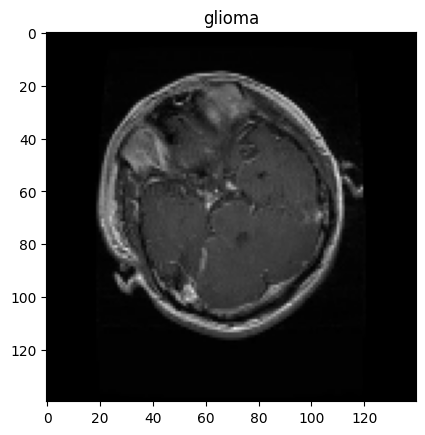

np.int64(58800)

In [ ]:
img1_r = cv2.resize(img1 ,(140,140))
plt.imshow(img1_r)
plt.title('glioma')
plt.show()
np.prod(img1_r.shape)



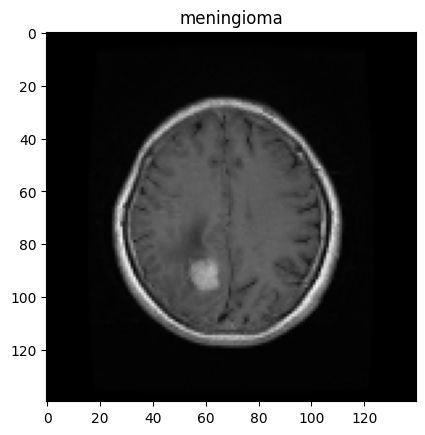

np.int64(58800)

In [ ]:
img2_r = cv2.resize(img2 ,(140,140))
plt.imshow(img2_r)
plt.title('meningioma')
plt.show()
np.prod(img2_r.shape)

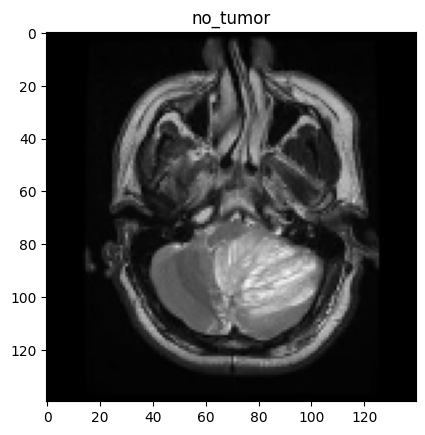

np.int64(58800)

In [ ]:
img3_r = cv2.resize(img3 ,(140,140))
plt.imshow(img3_r)
plt.title('no_tumor')
plt.show()
np.prod(img3_r.shape)

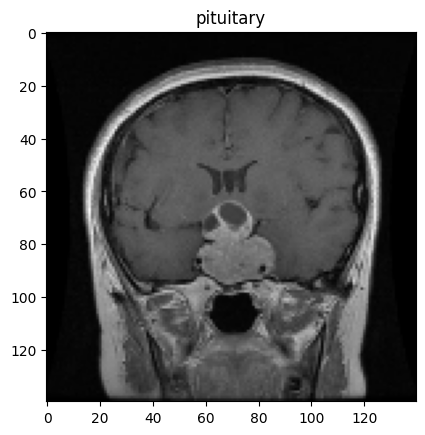

np.int64(58800)

In [ ]:
img4_r = cv2.resize(img4 ,(140,140))
plt.imshow(img4_r)
plt.title('pituitary')
plt.show()
np.prod(img4_r.shape)

In [4]:
import os
import shutil
from glob import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

# --- Configuración ---
source_dir = '/content/drive/MyDrive/operaciones/data'
output_base = '/content/drive/MyDrive/operaciones/salidas/data_modelo'
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
image_size = (140, 140)  # Puedes cambiar el tamaño aquí

# --- Cargar rutas y etiquetas ---
filepaths = []
labels = []

for cls in classes:
    cls_folder = os.path.join(source_dir, cls)
    images = glob(os.path.join(cls_folder, '*.jpg'))
    filepaths.extend(images)
    labels.extend([cls] * len(images))

df = pd.DataFrame({'filepath': filepaths, 'label': labels})

# --- División estratificada ---
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

# --- Función para redimensionar y copiar ---
def resize_and_copy(df_split, split_name):
    for _, row in df_split.iterrows():
        label = row['label']
        src = row['filepath']
        dst_dir = os.path.join(output_base, split_name, label)
        os.makedirs(dst_dir, exist_ok=True)
        dst_path = os.path.join(dst_dir, os.path.basename(src))

        try:
            # Abrir, redimensionar y guardar imagen
            img = Image.open(src).convert('RGB')  # Asegurarse de tener 3 canales
            img = img.resize(image_size)
            img.save(dst_path)
        except Exception as e:
            print(f"❌ Error al procesar {src}: {e}")

# --- Ejecutar el proceso completo ---
resize_and_copy(train_df, 'train')
resize_and_copy(val_df, 'val')
resize_and_copy(test_df, 'test')

print("✅ División y redimensionamiento completados: train / val / test con imágenes 224x224.")


✅ División y redimensionamiento completados: train / val / test con imágenes 224x224.


In [6]:
import numpy as np
from PIL import Image
from pathlib import Path

def cargar_imagenes_en_array(path):
    x_data = []
    y_data = []
    file_list = []

    path = Path(path)
    clases = sorted([carpeta.name for carpeta in path.iterdir() if carpeta.is_dir()])
    clase_a_indice = {clase: idx for idx, clase in enumerate(clases)}

    for clase in clases:
        carpeta = path / clase
        for imagen_path in carpeta.glob('*.*'):
            try:
                img = Image.open(imagen_path).convert('RGB')
                arr = np.array(img)
                x_data.append(arr)
                y_data.append(clase_a_indice[clase])
                file_list.append(imagen_path.name)
            except Exception as e:
                print(f"Error con la imagen: {imagen_path} | {e}")

    return np.array(x_data), np.array(y_data), file_list


In [7]:
train_path = '/content/drive/MyDrive/operaciones/salidas/data_modelo/train'
val_path = '/content/drive/MyDrive/operaciones/salidas/data_modelo/val'
test_path = '/content/drive/MyDrive/operaciones/salidas/data_modelo/test'

x_train, y_train, file_list_train = cargar_imagenes_en_array(train_path)
x_val, y_val, file_list_val = cargar_imagenes_en_array(val_path)
x_test, y_test, file_list_test = cargar_imagenes_en_array(test_path)


In [8]:
import joblib
import os

# Ruta destino
ruta_salida = "/content/drive/MyDrive/operaciones/salidas/data_final"

# Crear la carpeta si no existe
os.makedirs(ruta_salida, exist_ok=True)

# Guardar archivos
joblib.dump(x_train, os.path.join(ruta_salida, "x_train.pkl"))
joblib.dump(y_train, os.path.join(ruta_salida, "y_train.pkl"))
joblib.dump(x_val,   os.path.join(ruta_salida, "x_val.pkl"))
joblib.dump(y_val,   os.path.join(ruta_salida, "y_val.pkl"))
joblib.dump(x_test,  os.path.join(ruta_salida, "x_test.pkl"))
joblib.dump(y_test,  os.path.join(ruta_salida, "y_test.pkl"))


['/content/drive/MyDrive/operaciones/salidas/data_final/y_test.pkl']